In [2]:
import random
radius = 573.5 # 10**3 km 
# x = [random.uniform(0.0, radius) for _ in range(16)]
# y = [random.uniform(0.0, radius) for _ in range(16)]

x = [random.uniform(0.0, radius) for _ in range(10)]
y = [random.uniform(0.0, radius) for _ in range(10)]

# for i in range(len(x)):
#     x_1 = [random.gauss(x[i], radius/4) for _ in range(64)]
#     y_1 = [random.gauss(y[i], radius/4) for _ in range(64)]
#     UEs = np.zeros([64, 2])
#     UEs[:,0] = x_1
#     UEs[:,1] = y_1

# x_1 = [random.gauss(x[i], radius/32) for _ in range(64)]
# y_1 = [random.gauss(y[i], radius/32) for _ in range(64)]

Circle(xy=(286.75, 286.75), radius=573.5)


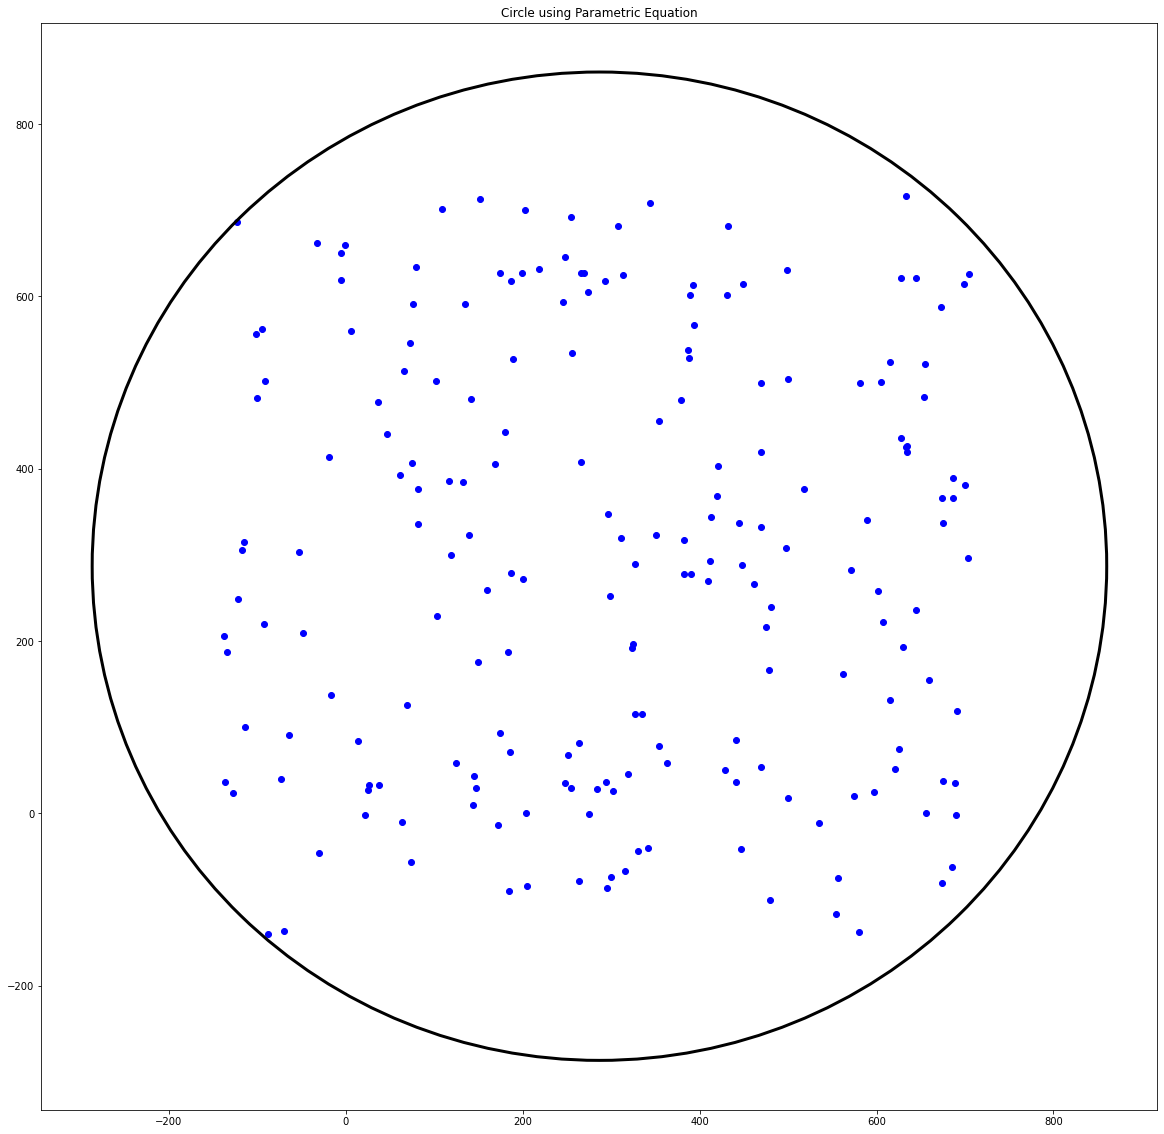

In [3]:
# 圓方程的中心半徑形式
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 100)

radius = 573.5 # 10**3 km 
a = radius*np.cos(theta)
b = radius*np.sin(theta)

beam_radius = 50

plt.figure(figsize=(20, 20))

x = [random.uniform(-radius/4, radius/4+radius) for _ in range(200)]
y = [random.uniform(-radius/4, radius/4+radius) for _ in range(200)]

plt.scatter(x, y, label='UT', color='b')

s = (radius/2, radius/2)
circle1 = plt.Circle(s, radius, color='k', fill=False, linewidth=3)
print(circle1)
plt.gca().add_patch(circle1)

# for i in range(len(x)):
#     circle1 = plt.Circle((x[i], y[i]), beam_radius, color='k', fill=False, linewidth=3)
#     plt.gca().add_patch(circle1)

plt.title('Circle using Parametric Equation')
plt.show()

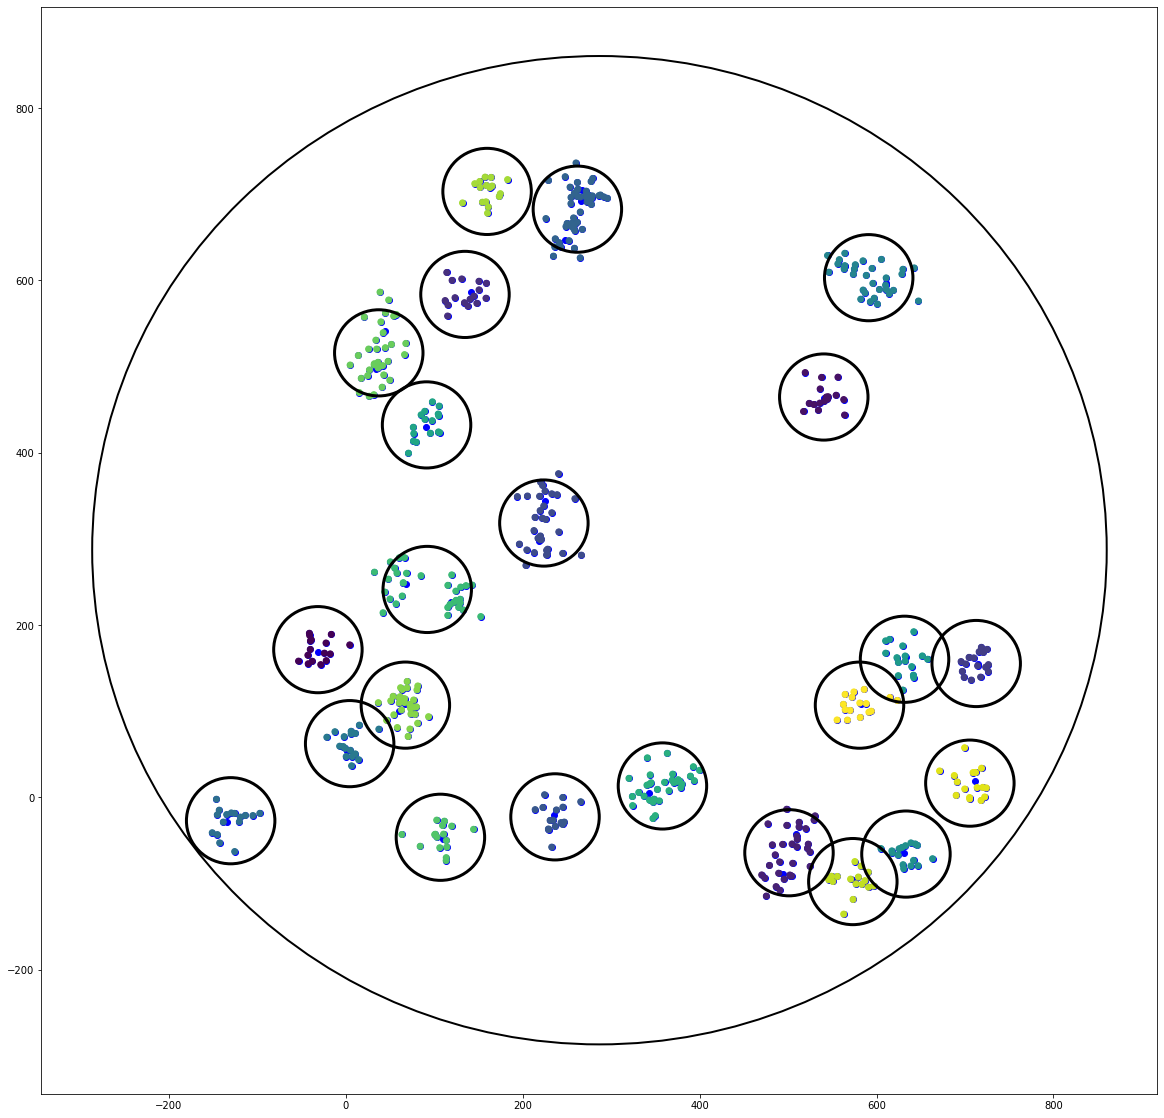

In [4]:
plt.figure(figsize=(20, 20))
from sklearn.cluster import KMeans

number_of_cluster = 32
UEs_in_cluster = 16
UEs = np.zeros([number_of_cluster*UEs_in_cluster, 2])

x = [random.uniform(-radius/4, radius/4+radius) for _ in range(number_of_cluster)]
y = [random.uniform(-radius/4, radius/4+radius) for _ in range(number_of_cluster)]

# for i in range(len(x)):
#     circle1 = plt.Circle((x[i], y[i]), 50, color='k', fill=False, linewidth=3)
#     plt.gca().add_patch(circle1)

plt.scatter(x, y, label='UT', color='b')

for i in range(len(x)):
    x_1 = [random.gauss(x[i], radius/40) for _ in range(UEs_in_cluster)]
    y_1 = [random.gauss(y[i], radius/40) for _ in range(UEs_in_cluster)]
    plt.scatter(x_1, y_1, label='UT', color='b')
    UEs[i*UEs_in_cluster:(i+1)*UEs_in_cluster, 0] = x_1
    UEs[i*UEs_in_cluster:(i+1)*UEs_in_cluster, 1] = y_1


kmeans = KMeans(n_clusters=23)
kmeans.fit(UEs)
plt.scatter(UEs[:,0],UEs[:,1],c=kmeans.predict(UEs))
circle1 = plt.Circle((radius/2, radius/2), radius, color='k', fill=False, linewidth=2)
plt.gca().add_patch(circle1)
for i in range(len(kmeans.cluster_centers_)):
    circle1 = plt.Circle((kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1]), 50, color='k', fill=False, linewidth=3)
    plt.gca().add_patch(circle1)
# kmeans.predict(UEs)

([<matplotlib.axis.YTick at 0x232e2cf8c88>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

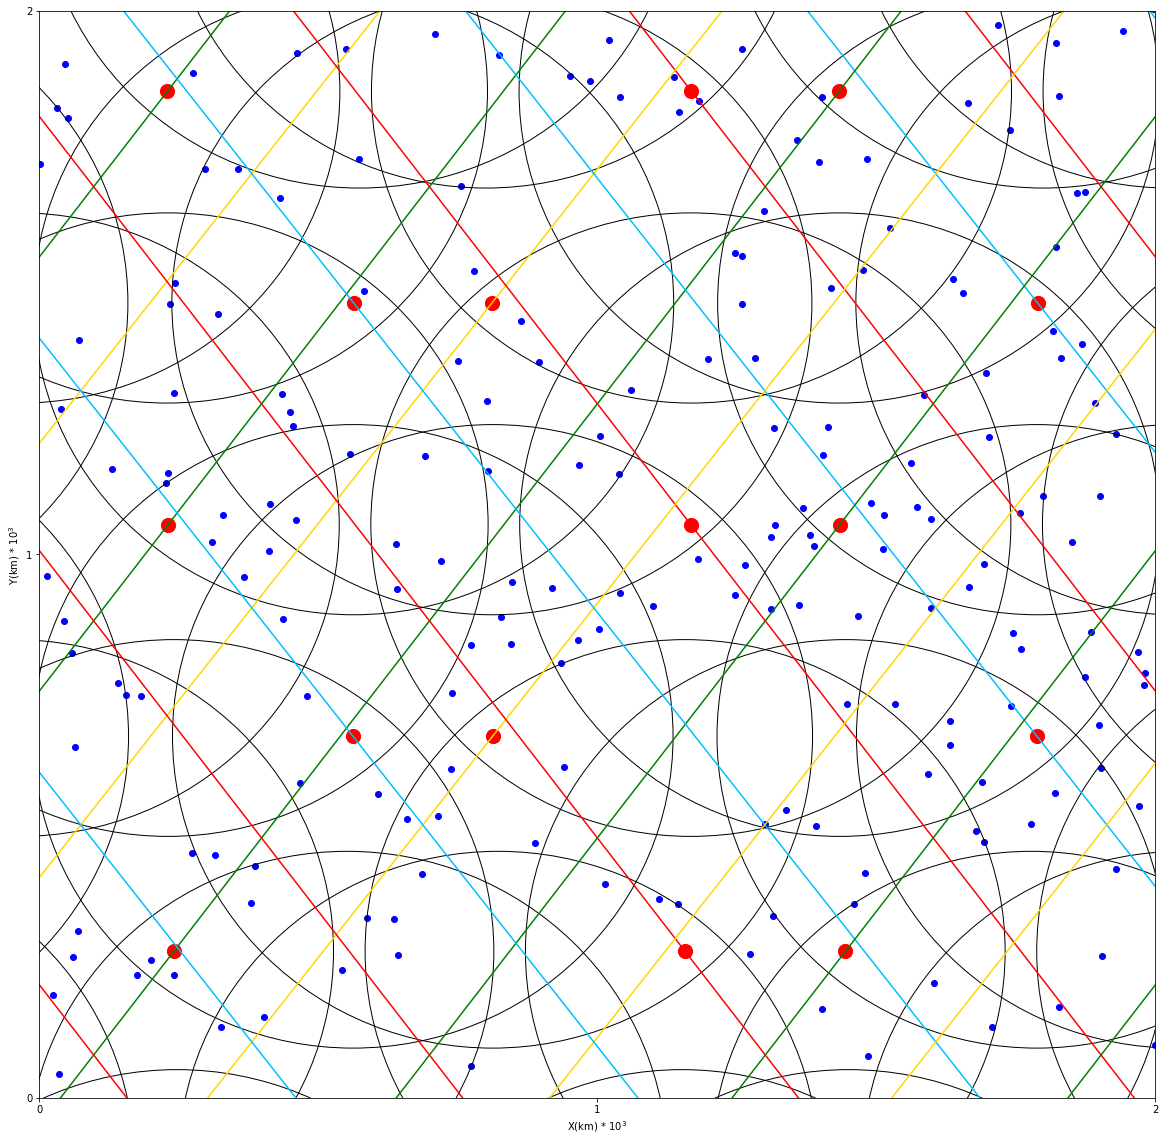

In [20]:
import copy
import math


linspace = np.linspace(0, 2, 3)
plt.figure(figsize=(20, 20))
# plt.style.use('classic')
plt.xlabel("X(km) * $\mathregular{10^3}$")
plt.ylabel("Y(km) * $\mathregular{10^3}$")

# # random_user(100)
# random.seed(11)

sin37 = math.sin(math.pi/180*37) # 0.601
sin53 = math.sin(math.pi/180*53) # 0.798
sin378 = math.sin(math.pi/180*37.8) # 0.601
sin532 = math.sin(math.pi/180*53.2) # 0.798
SatellitePerOrbit = 6
SatelliteSpace = 1.976
OrbitLength = SatelliteSpace * SatellitePerOrbit
SatelliteVelocity = 7.61268 * math.pow(10, -3) # 10**3 km/s
PeriodOrbit = int(OrbitLength / SatelliteVelocity) # 1557s 繞一圈
NumberOfOrbit = 7
satellite_radius = 0.5735
beam_radius = 0.028 # 3dB angle

# *********************** 秒 為單位 ***********************
RedLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
GreenLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
BlueLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
GlodLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])

for i in range(NumberOfOrbit):
    RedLine_x[i] = np.linspace(-SatelliteSpace/2*sin37-sin37*i, SatelliteSpace/2*sin37-sin37*i+sin37*((SatellitePerOrbit-1)*SatelliteSpace), int(OrbitLength / SatelliteVelocity))
    GreenLine_x[i] = np.linspace(2+sin37*i+SatelliteSpace/2*sin37, 2+sin37*i-sin37*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin37, int(OrbitLength / SatelliteVelocity))
    BlueLine_x[i] = np.linspace(0.3-SatelliteSpace/2*sin378-sin378*i, 0.3+SatelliteSpace/2*sin378-sin378*i+sin378*((SatellitePerOrbit-1)*SatelliteSpace), int(OrbitLength / SatelliteVelocity))
    GlodLine_x[i] = np.linspace(2.3+sin378*i+SatelliteSpace/2*sin378, 2.3+sin378*i-sin378*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin378, int(OrbitLength / SatelliteVelocity))
    
Index_RedLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
Index_GreenLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
Index_BlueLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
Index_GlodLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
for i in range(NumberOfOrbit):
    if i % 2 == 1:
        Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6 ), SatellitePerOrbit).astype(int)
        Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
        Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
        Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
    else:
        Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
        Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
        Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
        Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)

Index_BlueLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)
Index_GlodLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)

y_start = 5.789051883926725
y_end = -3.6795707231939776
y_table = np.linspace(y_start, y_end, int(OrbitLength / SatelliteVelocity))
# *********************** 秒 為單位 ***********************


All_Center = np.zeros([NumberOfOrbit*SatellitePerOrbit*4, 2]) # 所有衛星的中心位置

for i in range(NumberOfOrbit):
    plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
    plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
    plt.plot([BlueLine_x[i][0], BlueLine_x[i][-1]], [y_table[0], y_table[-1]], color='deepskyblue')
    plt.plot([GlodLine_x[i][0], GlodLine_x[i][-1]], [y_table[0], y_table[-1]], color='gold')

def Inintial_All_Center(All_Center):
    for i in range(NumberOfOrbit):
        for s in range(SatellitePerOrbit):
            RedCenter_x = RedLine_x[i][int(Index_RedLocation[i][s])]
            RedCenter_y = y_table[int(Index_RedLocation[i][s])]
            plt.scatter(RedCenter_x, RedCenter_y, color='r', s=200)
            circle1 = plt.Circle([RedCenter_x, RedCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            GreenCenter_x = GreenLine_x[i][int(Index_GreenLocation[i][s])]
            GreenCenter_y = y_table[int(Index_GreenLocation[i][s])]
            plt.scatter(GreenCenter_x, GreenCenter_y, color='r', s=200)
            circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            BlueCenter_x = BlueLine_x[i][int(Index_BlueLocation[i][s])]
            BlueCenter_y = y_table[int(Index_BlueLocation[i][s])]
            plt.scatter(BlueCenter_x, BlueCenter_y, color='r', s=200)
            circle1 = plt.Circle([BlueCenter_x, BlueCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            GlodCenter_x = GlodLine_x[i][int(Index_GlodLocation[i][s])]
            GlodCenter_y = y_table[int(Index_GlodLocation[i][s])]
            plt.scatter(GlodCenter_x, GlodCenter_y, color='r', s=200)
            circle1 = plt.Circle([GlodCenter_x, GlodCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            All_Center[i * 24 + s * 4] = RedCenter_x, RedCenter_y
            All_Center[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
            All_Center[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
            All_Center[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
    return All_Center
    
Inintial_All_Center(All_Center)


# # -------------------------- tracing move --------------
def Satellites_Centers_at_time(Centers, second):
    Temporary_Centers = copy.deepcopy(Centers)
    for i in range(NumberOfOrbit):
        for s in range(SatellitePerOrbit):
            RedCenter_x = RedLine_x[i][(int(Index_RedLocation[i][s])+second)%1557]
            RedCenter_y = y_table[(int(Index_RedLocation[i][s])+second)%1557]
            GreenCenter_x = GreenLine_x[i][(int(Index_GreenLocation[i][s])-second)%1557]
            GreenCenter_y = y_table[(int(Index_GreenLocation[i][s])-second)%1557]
            BlueCenter_x = BlueLine_x[i][(int(Index_BlueLocation[i][s])+second)%1557]
            BlueCenter_y = y_table[(int(Index_BlueLocation[i][s])+second)%1557]
            GlodCenter_x = GlodLine_x[i][(int(Index_GlodLocation[i][s])-second)%1557]
            GlodCenter_y = y_table[(int(Index_GlodLocation[i][s])-second)%1557]
            Temporary_Centers[i * 24 + s * 4] = RedCenter_x, RedCenter_y
            Temporary_Centers[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
            Temporary_Centers[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
            Temporary_Centers[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
#             plt.scatter(RedCenter_x, RedCenter_y, color='y')
#             plt.scatter(GreenCenter_x, GreenCenter_y, color='y')
#             plt.scatter(BlueCenter_x, BlueCenter_y, color='y')
#             plt.scatter(GlodCenter_x, GlodCenter_y, color='y')
    return Temporary_Centers

Satellites_Centers_at_time(All_Center, 100)

# # # -------------------------- tracing move --------------
# def TracingMove(second):
#     for i in range(NumberOfOrbit):
#     #     plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
#     #     plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
#         for s in range(SatellitePerOrbit):
#             RedCenter_x = RedLine_x[i][(int(Index_RedLocation[i][s])+second)%1557]
#             RedCenter_y = y_table[(int(Index_RedLocation[i][s])+second)%1557]
#             plt.scatter(RedCenter_x, RedCenter_y, color='y')
#             circle1 = plt.Circle([RedCenter_x, RedCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)

#             GreenCenter_x = GreenLine_x[i][(int(Index_GreenLocation[i][s])-second)%1557]
#             GreenCenter_y = y_table[(int(Index_GreenLocation[i][s])-second)%1557]
#             plt.scatter(GreenCenter_x, GreenCenter_y, color='y')
#             circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)

#             BlueCenter_x = BlueLine_x[i][(int(Index_BlueLocation[i][s])+second)%1557]
#             BlueCenter_y = y_table[(int(Index_BlueLocation[i][s])+second)%1557]
#             plt.scatter(BlueCenter_x, BlueCenter_y, color='y')
#             circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)

#             GlodCenter_x = GlodLine_x[i][(int(Index_GlodLocation[i][s])-second)%1557]
#             GlodCenter_y = y_table[(int(Index_GlodLocation[i][s])-second)%1557] 
#             plt.scatter(GlodCenter_x, GlodCenter_y, color='y')
#             circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)
# # TracingMove(10)

x = [random.uniform(0, 2) for _ in range(200)]
y = [random.uniform(0, 2) for _ in range(200)]
plt.scatter(x, y, label='UT', color='b')

# for i in range(len(x)):
#     x_1 = [random.gauss(x[i], satellite_radius/10) for _ in range(UEs_in_cluster)]
#     y_1 = [random.gauss(y[i], satellite_radius/10) for _ in range(UEs_in_cluster)]
#     plt.scatter(x_1, y_1, label='UT', color='b')
#     UEs[i*UEs_in_cluster:(i+1)*UEs_in_cluster, 0] = x_1
#     UEs[i*UEs_in_cluster:(i+1)*UEs_in_cluster, 1] = y_1

# x = [random.uniform(0.2, 0.8) for _ in range(number_of_cluster)]
# y = [random.uniform(0.2, 0.8) for _ in range(number_of_cluster)]

# for i in range(len(x)):
#     x_1 = [random.gauss(x[i], satellite_radius/10) for _ in range(UEs_in_cluster)]
#     y_1 = [random.gauss(y[i], satellite_radius/10) for _ in range(UEs_in_cluster)]
#     plt.scatter(x_1, y_1, label='UT', color='b')
#     UEs[i*UEs_in_cluster:(i+1)*UEs_in_cluster, 0] = x_1
#     UEs[i*UEs_in_cluster:(i+1)*UEs_in_cluster, 1] = y_1
# print(i)
    
# kmeans = KMeans(n_clusters=60)
# kmeans.fit(UEs)
# cluster_centers_1 = kmeans.cluster_centers_
# for i in range(len(cluster_centers_1)):
#     plt.scatter(cluster_centers_1[i][0], cluster_centers_1[i][1], label='UT', color='b')
#     circle1 = plt.Circle((cluster_centers_1[i][0], cluster_centers_1[i][1]), beam_radius, color='k', fill=False, linewidth=3)
#     plt.gca().add_patch(circle1)

# mask = np.zeros(len(UEs), dtype=bool)
# for i in range(len(cluster_centers_1)):
#     centers_x = cluster_centers_1[i][0]
#     centers_y = cluster_centers_1[i][1]
#     for j in range(len(UEs)):
#         dis = math.sqrt(math.pow((centers_x-UEs[j][0]), 2) + math.pow((centers_y-UEs[j][1]), 2))
#         if dis < beam_radius:
#             if mask[j] == False:
#                 mask[j] = True
#             else:
#                 mask[j] = False

# for i in range(len(UEs[mask])):
#     plt.scatter(UEs[mask][i][0], UEs[mask][i][1], label='UT', color='b')
# print(i)

# beam_iswhich_satellite = []
# for i in range(len(cluster_centers_1)):
#     distance = []
#     for j in range(len(All_Center)):
#         dis = math.sqrt(math.pow((cluster_centers_1[i][0]-All_Center[j][0]), 2) + math.pow((cluster_centers_1[i][1]-All_Center[j][1]), 2))
#         distance.append(dis)
# #     print(distance.index(min(distance)))
#     beam_iswhich_satellite.append(distance.index(min(distance)))

# # print(beam_iswhich_satellite)
    
# beam_color_dic = {}
# color = ['black', 'rosybrown', 'red', 'saddlebrown', 'darkorange', 'yellow',
#          'olivedrab', 'lawngreen', 'aquamarine', 'springgreen', 'dodgerblue',
#          'deeppink', 'blueviolet', 'fuchsia', 'hotpink', 'silver'
#         ]
# for i, j in enumerate(np.unique(beam_iswhich_satellite)):
#     beam_color_dic[j] = color[i]
# for i, j in enumerate(beam_iswhich_satellite):
#     plt.scatter(cluster_centers_1[i][0], cluster_centers_1[i][1], label='UT', color=beam_color_dic[j])
#     plt.scatter(All_Center[j][0], All_Center[j][1], color=beam_color_dic[j], s=200)
    
plt.xlim(0,2)
plt.ylim(0,2)

plt.xticks(linspace)
plt.yticks(linspace)

In [5]:
from collections import Counter

print(Counter(beam_iswhich_satellite).keys())
print(Counter(beam_iswhich_satellite).values())

dict_keys([87, 134, 85, 158, 61, 108, 111, 156])
dict_values([10, 23, 17, 2, 4, 1, 2, 1])


In [6]:
np.set_printoptions(threshold=np.inf)
def find_available_satellite(x_value, y_value, second):
    Centers = copy.deepcopy(All_Center)
    Centers = Satellites_Centers_at_time(Centers, second)
    mask = np.full(All_Center.shape[0], False)
    distance = []
    for i in range(len(Centers)):
        d = math.sqrt(math.pow((x_value-Centers[i][0]), 2)+ math.pow((y_value-Centers[i][1]), 2))
        if(d < 0.5515):
            distance.append(d)
            mask[i] = True
    available_satellite_index = list(np.where(mask)[0])
    return distance, available_satellite_index

In [53]:
def access_shortest_satellite_at_time(cluster_centers_1, second):
    UE_access_satellite = []
    for i in range(len(cluster_centers_1)):
        distance, available_satellite_index = find_available_satellite(cluster_centers_1[i][0], cluster_centers_1[i][1], second)
        UE_access_satellite.append(available_satellite_index[distance.index(min(distance))])
#         print(available_satellite_index[distance.index(min(distance))])
#         break
    return UE_access_satellite

# access_shortest_satellite_at_time(cluster_centers_1, 0)
def access_shortest_satellite_during_time(cluster_centers_1, duration):
    access_table = np.zeros((duration, len(cluster_centers_1)))
    for i in range(duration):
#         print(access_shortest_satellite_at_time(i))
        access_table[i] = access_shortest_satellite_at_time(cluster_centers_1, i)
    return access_table
        
access_table = access_shortest_satellite_during_time(cluster_centers_1, 100)

In [51]:
def access_longest_service_time_satellite_at_time(cluster_centers_1, second):
    UE_access_satellite = []
    UE_duration = []
    for i in range(len(cluster_centers_1)):
        distance, available_satellite_index = find_available_satellite(cluster_centers_1[i][0], cluster_centers_1[i][1], second)
        service_time = []
        for s in available_satellite_index:
            count = 1
            while True:
                Temporary_Centers = Satellites_Centers_at_time(All_Center, second+count)
                d = math.sqrt(math.pow((cluster_centers_1[i][0] - Temporary_Centers[s][0]), 2) + math.pow((cluster_centers_1[i][1] - Temporary_Centers[s][1]), 2))
                if d < 0.5735:
                    count += 1
                else:
                    service_time.append(count)
                    break
#         print('UE_', str(i), sep='')
#         print(service_time)
#         print(max(service_time))
#         print(distance)
#         print(available_satellite_index[service_time.index(max(service_time))])
        UE_access_satellite.append(available_satellite_index[service_time.index(max(service_time))])
        UE_duration.append(max(service_time))
#         print('-----------------------------------------------------------------------')
#     print('UE_access_satellite:', UE_access_satellite)
#     print('UE_duration:', UE_duration)    
    return UE_access_satellite, UE_duration

# access_longest_service_time_satellite_at_time(cluster_centers_1, 0)

def access_longest_service_time_satellite_during_time(cluster_centers_1, duration):
    access_table = np.zeros((duration, len(cluster_centers_1)))
    for i in range(duration):
#         print(np.where(access_table[i, :]) == 0)
        if(np.where(access_table[i, :] == 0)[0].size != 0):
            UE_access_satellite, UE_duration = access_longest_service_time_satellite_at_time(cluster_centers_1, i)
            for index in np.where(access_table[i, :] == 0)[0]:
                access_table[i:i+UE_duration[index], index] = UE_access_satellite[index]
    return access_table
            
access_longest_service_time_satellite_during_time(cluster_centers_1, 100)

array([[156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 134., 132., 156.],
       [156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 134., 132., 156.],
       [156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 134., 132., 156.],
       [156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 134., 132., 156.],
       [156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 134., 132., 156.],
       [156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 134., 132., 156.],
       [156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 134., 132., 156.],
       [156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 134., 132., 156.],
       [156., 134., 134.,  85.,  85., 134.,  85., 134.,  85., 134.,  85.,
        134., 134., 13

In [49]:
def access_shortest_satellite_slow_model_during_time(cluster_centers_1, duration):
    access_table = np.zeros((duration, len(cluster_centers_1)))
    for i in range(duration):
        if(np.where(access_table[i, :] == 0)[0].size != 0):
            for index in np.where(access_table[i, :] == 0)[0]:
                distance, available_satellite_index = find_available_satellite(cluster_centers_1[index][0], cluster_centers_1[index][1], i)
                UE_access_shortest_satellite = available_satellite_index[distance.index(min(distance))]
                count = 1
                while True:
                    Temporary_Centers = Satellites_Centers_at_time(All_Center, i+count)
                    d = math.sqrt(math.pow((cluster_centers_1[index][0] - Temporary_Centers[UE_access_shortest_satellite][0]), 2) + math.pow((cluster_centers_1[index][1] - Temporary_Centers[UE_access_shortest_satellite][1]), 2))
                    if d < 0.5735:
                        count += 1
                    else:
                        service_time = count
                        break
                access_table[i:i+service_time, index] = UE_access_shortest_satellite
    return access_table
        
access_shortest_satellite_slow_model_during_time(cluster_centers_1, 100)

array([[ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 134., 134.,  85.],
       [ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 134., 134.,  85.],
       [ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 134., 134.,  85.],
       [ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 134., 134.,  85.],
       [ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 134., 134.,  85.],
       [ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 134., 134.,  85.],
       [ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 134., 134.,  85.],
       [ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 134., 134.,  85.],
       [ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
         87.,  87., 13

In [10]:
# # kmeans_2 = KMeans(n_clusters=30)
# # kmeans_2.fit(cluster_centers_1)
# # cluster_centers_2 = kmeans_2.cluster_centers_
# # y_kmeans = kmeans_2.predict(cluster_centers_1)

# # for i in range(len(cluster_centers_2)):
# #     plt.scatter(cluster_centers_1[:, 0], cluster_centers_1[:, 1], c=y_kmeans, s=50, cmap='viridis')

    
    
# # cluster2_iswhich_satellite = []
# # beam_dict = {}
# # for i in range(len(kmeans_2.cluster_centers_)):
# #     distance = []
# #     centers_x = kmeans_2.cluster_centers_[i][0]
# #     centers_y = kmeans_2.cluster_centers_[i][1]
# #     for j in range(len(All_Center)):
# #         dis = math.sqrt(math.pow((centers_x-All_Center[j][0]), 2) + math.pow((centers_y-All_Center[j][1]), 2))
# #         distance.append(dis)
# #     cluster2_iswhich_satellite.append(distance.index(min(distance)))
# # for a, i in enumerate(cluster2_iswhich_satellite):
# #     print(All_Center[i])
# #     c = np.array([a])
# #     print(c)
# #     plt.scatter(All_Center[i][0], All_Center[i][1], c=c, s=200)

# cluster2_iswhich_satellite = []
# beam_iswhich_satellite = []

# for i in range(len(kmeans_2.cluster_centers_)):
#     distance = []
#     centers_x = kmeans_2.cluster_centers_[i][0]
#     centers_y = kmeans_2.cluster_centers_[i][1]
#     for j in range(len(All_Center)):
#         dis = math.sqrt(math.pow((centers_x-All_Center[j][0]), 2) + math.pow((centers_y-All_Center[j][1]), 2))
#         distance.append(dis)
#     cluster2_iswhich_satellite.append(distance.index(min(distance)))
# #     print(distance.index(min(distance)))
# #     break
# print(cluster2_iswhich_satellite)

# for i in y_kmeans:
#     beam_iswhich_satellite.append(cluster2_iswhich_satellite[i])

In [54]:
beam_iswhich_satellite

[85, 134, 158, 87, 134, 85, 134, 85, 134, 111, 85, 87, 87, 134, 134, 85]

In [12]:
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import math

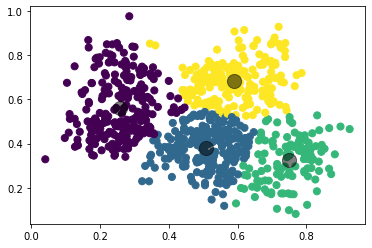

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(UEs)
y_kmeans = kmeans.predict(UEs)

plt.scatter(UEs[:, 0], UEs[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


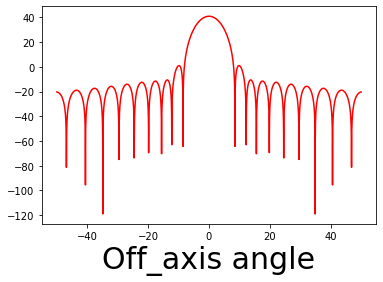

In [33]:
from scipy.special import jv

PeakGain = 41 # 41.0 dBi

test = np.linspace(-50, 50, 10000)
test_y = np.zeros_like(test)
for i in range(len(test)):
    u_variable = 2.07123 * math.sin(test[i] * math.pi / 180) / math.sin(2.98 * math.pi / 180) # math 的 input 是 rad
    alpha = abs((jv(1, u_variable) / 2 / u_variable) + (36 * jv(3, u_variable) / math.pow(u_variable, 3)))
    test_y[i] = alpha

test_y = 10*np.log(test_y)+PeakGain

plt.plot(test, test_y, 'r')
plt.xlabel("Off_axis angle", fontsize=30)
plt.show()

In [43]:
10*np.log(alpha)

-40.04209459243037

In [42]:
u_variable = 2.07123 * math.sin(2.98 * math.pi / 180) / math.sin(2.98 * math.pi / 180) # math 的 input 是 rad
alpha = abs((jv(1, u_variable) / 2 / u_variable) + (36 * jv(3, u_variable) / math.pow(u_variable, 3)))
alpha

0.01823870199828141

In [16]:
def calculate_beam_gain(All_Center):
    Off_Axis = np.zeros((len(All_Center), len(cluster_centers_1), len(cluster_centers_1)))
    Alpha = np.zeros_like(Off_Axis)

    for i in range(Off_Axis.shape[0]):
        for j in range(Off_Axis.shape[1]):
            if (math.sqrt((math.pow(All_Center[i][0] - cluster_centers_1[j][0], 2) + math.pow(All_Center[i][1] - cluster_centers_1[j][1], 2))) > 0.575):
                    Off_Axis[i][j] = 1
                    continue
            for k in range(Off_Axis.shape[2]):
                dis_A = math.sqrt((math.pow(All_Center[i][0] - cluster_centers_1[j][0], 2) + math.pow(All_Center[i][1] - cluster_centers_1[j][1], 2)) + math.pow(0.55, 2))
                dis_B = math.sqrt((math.pow(All_Center[i][0] - cluster_centers_1[k][0], 2) + math.pow(All_Center[i][1] - cluster_centers_1[k][1], 2)) + math.pow(0.55, 2))
                dis_A_B = math.sqrt(math.pow(cluster_centers_1[j][0] - cluster_centers_1[k][0], 2) + math.pow(cluster_centers_1[j][1] - cluster_centers_1[k][1], 2))
                cos_C = (math.pow(dis_A, 2) + math.pow(dis_B, 2) - math.pow(dis_A_B, 2)) / 2 / dis_A / dis_B
    #             print(cos_C)
                if cos_C > 1:
                    cos_C = 1
                off_axis = math.acos(cos_C)
                Off_Axis[i][j][k] = off_axis

#     return Off_Axis
                
    for i in range(Off_Axis.shape[0]):
        for j in range(Off_Axis.shape[1]):
            for k in range(Off_Axis.shape[2]):
                if Off_Axis[i][j][k] == 1: # 打不到
                    Alpha[i][j][k] = 0
                elif Off_Axis[i][j][k] == 0: # boresight
                    Alpha[i][j][k] = 1
                else:
                    u_variable = 2.07123 * math.sin(Off_Axis[i][j][k]) / math.sin(2.98 * math.pi / 180) # math三角函數 input為 rad
                    alpha = abs((jv(1, u_variable) / 2 / u_variable) + (36 * jv(3, u_variable) / math.pow(u_variable, 3)))
                    Alpha[i][j][k] = alpha
                        
    return Alpha

In [61]:
Alpha = calculate_beam_gain(All_Center)
Alpha[85]

array([[1.00000000e+00, 8.31727443e-04, 4.45372495e-03, 6.46955791e-04,
        3.43745428e-03, 1.33560896e-02, 3.43652488e-03, 4.24403388e-03,
        2.38864872e-04, 3.84225115e-03, 4.03018278e-03, 4.49538299e-04,
        8.53519872e-04, 1.31133827e-03, 2.87068842e-03, 1.83663722e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.45372495e-03, 1.46766370e-03, 1.00000000e+00, 1.40841350e-03,
        1.56452260e-03, 5.14328634e-03, 1.87117124e-03, 6.72863867e-03,
        2.44981165e-03, 6.90249990e-02, 2.25675849e-03, 2.92167138e-03,
        1.92065641e-03, 2.13231308e-03, 9.62463773e-04, 3.87686231e-03],
       [6.46955791e-04, 1.98500777e-03, 1.40841350e-03, 1.00000000e+00,
        1.83727124e-03, 5.93274104e-04, 3.85184629e-03, 3.355

In [18]:
u_variable = 2.07123 * math.sin(1) / math.sin(2.98 * math.pi / 180) # math三角函數 input為 rad
alpha = abs((jv(1, u_variable) / 2 / u_variable) + (36 * jv(3, u_variable) / math.pow(u_variable, 3)))
alpha

0.001867612272887767

In [19]:
math.tan(math.pi / 60) * 550

28.824278605672657

845


([<matplotlib.axis.YTick at 0x232e139d828>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

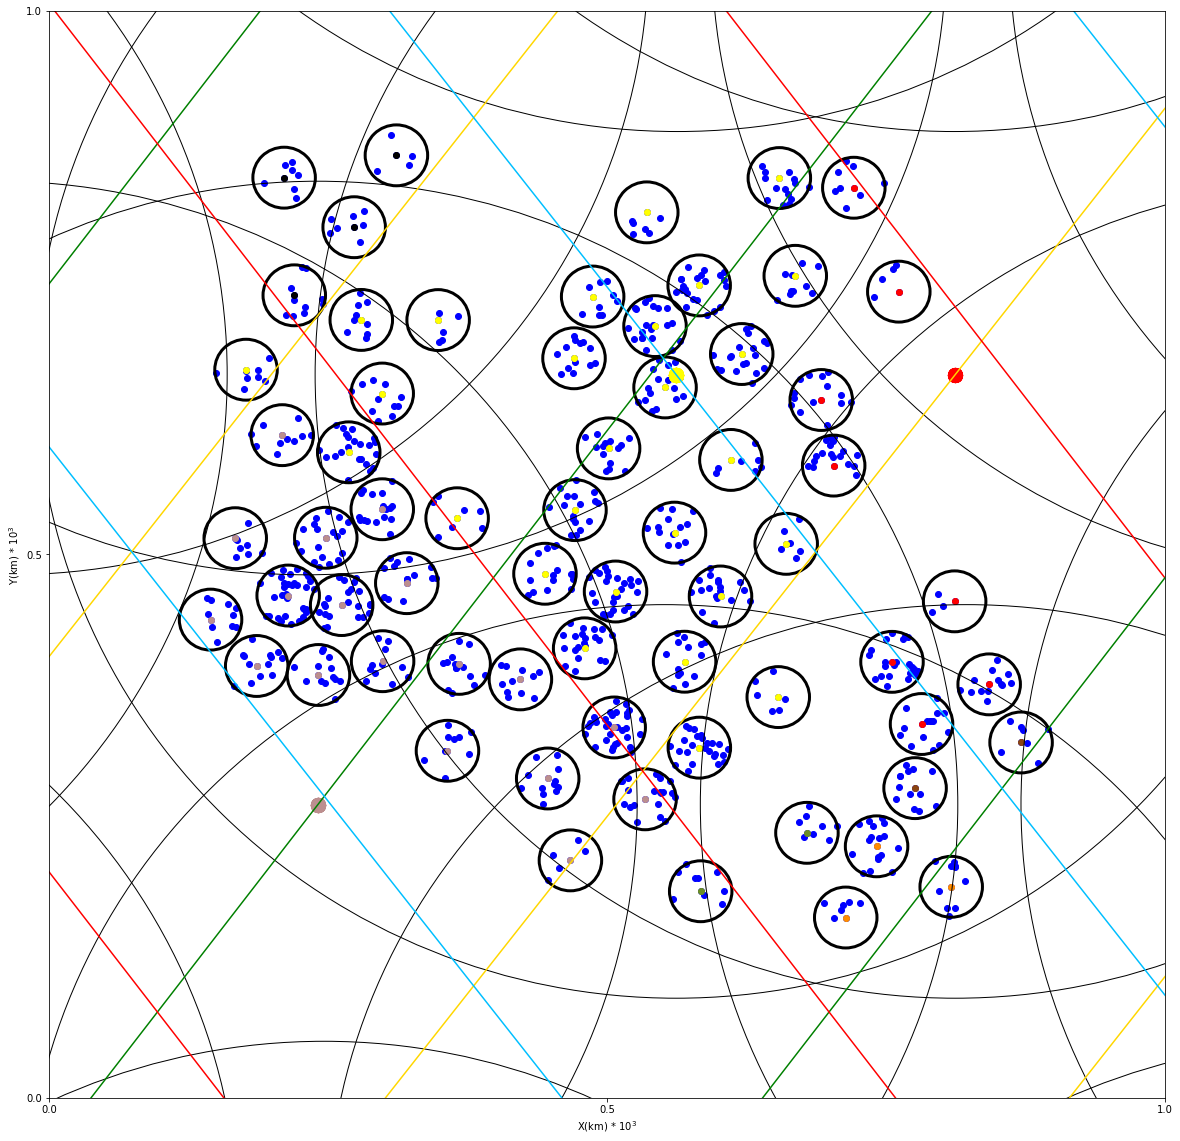

In [14]:
import copy
import math


linspace = np.linspace(0, 1, 3)
plt.figure(figsize=(20, 20))
# plt.style.use('classic')
plt.xlabel("X(km) * $\mathregular{10^3}$")
plt.ylabel("Y(km) * $\mathregular{10^3}$")

# random_user(100)
random.seed(11)

sin37 = math.sin(math.pi/180*37) # 0.601
sin53 = math.sin(math.pi/180*53) # 0.798
sin378 = math.sin(math.pi/180*37.8) # 0.601
sin532 = math.sin(math.pi/180*53.2) # 0.798
SatellitePerOrbit = 6
SatelliteSpace = 1.976
OrbitLength = SatelliteSpace * SatellitePerOrbit
SatelliteVelocity = 7.61268 * math.pow(10, -3) # 10**3 km/s
PeriodOrbit = int(OrbitLength / SatelliteVelocity) # 1557s 繞一圈
NumberOfOrbit = 7
satellite_radius = 0.5735
beam_radius = 0.028 # 3dB angle

# *********************** 秒 為單位 ***********************
RedLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
GreenLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
BlueLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
GlodLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])

for i in range(NumberOfOrbit):
    RedLine_x[i] = np.linspace(-SatelliteSpace/2*sin37-sin37*i, SatelliteSpace/2*sin37-sin37*i+sin37*((SatellitePerOrbit-1)*SatelliteSpace), int(OrbitLength / SatelliteVelocity))
    GreenLine_x[i] = np.linspace(2+sin37*i+SatelliteSpace/2*sin37, 2+sin37*i-sin37*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin37, int(OrbitLength / SatelliteVelocity))
    BlueLine_x[i] = np.linspace(0.3-SatelliteSpace/2*sin378-sin378*i, 0.3+SatelliteSpace/2*sin378-sin378*i+sin378*((SatellitePerOrbit-1)*SatelliteSpace), int(OrbitLength / SatelliteVelocity))
    GlodLine_x[i] = np.linspace(2.3+sin378*i+SatelliteSpace/2*sin378, 2.3+sin378*i-sin378*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin378, int(OrbitLength / SatelliteVelocity))
    
Index_RedLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
Index_GreenLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
Index_BlueLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
Index_GlodLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
for i in range(NumberOfOrbit):
    if i % 2 == 1:
        Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6 ), SatellitePerOrbit).astype(int)
        Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
        Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
        Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
    else:
        Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
        Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
        Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
        Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)

Index_BlueLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)
Index_GlodLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)

y_start = 5.789051883926725
y_end = -3.6795707231939776
y_table = np.linspace(y_start, y_end, int(OrbitLength / SatelliteVelocity))
# *********************** 秒 為單位 ***********************


All_Center = np.zeros([NumberOfOrbit*SatellitePerOrbit*4, 2]) # 所有衛星的中心位置

for i in range(NumberOfOrbit):
    plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
    plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
    plt.plot([BlueLine_x[i][0], BlueLine_x[i][-1]], [y_table[0], y_table[-1]], color='deepskyblue')
    plt.plot([GlodLine_x[i][0], GlodLine_x[i][-1]], [y_table[0], y_table[-1]], color='gold')

def Inintial_All_Center(All_Center):
    for i in range(NumberOfOrbit):
        for s in range(SatellitePerOrbit):
            RedCenter_x = RedLine_x[i][int(Index_RedLocation[i][s])]
            RedCenter_y = y_table[int(Index_RedLocation[i][s])]
            plt.scatter(RedCenter_x, RedCenter_y, color='r', s=200)
            circle1 = plt.Circle([RedCenter_x, RedCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            GreenCenter_x = GreenLine_x[i][int(Index_GreenLocation[i][s])]
            GreenCenter_y = y_table[int(Index_GreenLocation[i][s])]
            plt.scatter(GreenCenter_x, GreenCenter_y, color='r', s=200)
            circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            BlueCenter_x = BlueLine_x[i][int(Index_BlueLocation[i][s])]
            BlueCenter_y = y_table[int(Index_BlueLocation[i][s])]
            plt.scatter(BlueCenter_x, BlueCenter_y, color='r', s=200)
            circle1 = plt.Circle([BlueCenter_x, BlueCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            GlodCenter_x = GlodLine_x[i][int(Index_GlodLocation[i][s])]
            GlodCenter_y = y_table[int(Index_GlodLocation[i][s])]
            plt.scatter(GlodCenter_x, GlodCenter_y, color='r', s=200)
            circle1 = plt.Circle([GlodCenter_x, GlodCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            All_Center[i * 24 + s * 4] = RedCenter_x, RedCenter_y
            All_Center[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
            All_Center[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
            All_Center[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
    return All_Center
    
Inintial_All_Center(All_Center)


# # -------------------------- tracing move --------------
def Satellites_Centers_at_time(Centers, second):
    Temporary_Centers = copy.deepcopy(Centers)
    for i in range(NumberOfOrbit):
        for s in range(SatellitePerOrbit):
            RedCenter_x = RedLine_x[i][(int(Index_RedLocation[i][s])+second)%1557]
            RedCenter_y = y_table[(int(Index_RedLocation[i][s])+second)%1557]
            GreenCenter_x = GreenLine_x[i][(int(Index_GreenLocation[i][s])-second)%1557]
            GreenCenter_y = y_table[(int(Index_GreenLocation[i][s])-second)%1557]
            BlueCenter_x = BlueLine_x[i][(int(Index_BlueLocation[i][s])+second)%1557]
            BlueCenter_y = y_table[(int(Index_BlueLocation[i][s])+second)%1557]
            GlodCenter_x = GlodLine_x[i][(int(Index_GlodLocation[i][s])-second)%1557]
            GlodCenter_y = y_table[(int(Index_GlodLocation[i][s])-second)%1557]
            Temporary_Centers[i * 24 + s * 4] = RedCenter_x, RedCenter_y
            Temporary_Centers[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
            Temporary_Centers[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
            Temporary_Centers[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
#             plt.scatter(RedCenter_x, RedCenter_y, color='y')
#             plt.scatter(GreenCenter_x, GreenCenter_y, color='y')
#             plt.scatter(BlueCenter_x, BlueCenter_y, color='y')
#             plt.scatter(GlodCenter_x, GlodCenter_y, color='y')
    return Temporary_Centers

Satellites_Centers_at_time(All_Center, 100)

# # # -------------------------- tracing move --------------
# def TracingMove(second):
#     for i in range(NumberOfOrbit):
#     #     plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
#     #     plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
#         for s in range(SatellitePerOrbit):
#             RedCenter_x = RedLine_x[i][(int(Index_RedLocation[i][s])+second)%1557]
#             RedCenter_y = y_table[(int(Index_RedLocation[i][s])+second)%1557]
#             plt.scatter(RedCenter_x, RedCenter_y, color='y')
#             circle1 = plt.Circle([RedCenter_x, RedCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)

#             GreenCenter_x = GreenLine_x[i][(int(Index_GreenLocation[i][s])-second)%1557]
#             GreenCenter_y = y_table[(int(Index_GreenLocation[i][s])-second)%1557]
#             plt.scatter(GreenCenter_x, GreenCenter_y, color='y')
#             circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)

#             BlueCenter_x = BlueLine_x[i][(int(Index_BlueLocation[i][s])+second)%1557]
#             BlueCenter_y = y_table[(int(Index_BlueLocation[i][s])+second)%1557]
#             plt.scatter(BlueCenter_x, BlueCenter_y, color='y')
#             circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)

#             GlodCenter_x = GlodLine_x[i][(int(Index_GlodLocation[i][s])-second)%1557]
#             GlodCenter_y = y_table[(int(Index_GlodLocation[i][s])-second)%1557] 
#             plt.scatter(GlodCenter_x, GlodCenter_y, color='y')
#             circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)
# # TracingMove(10)

number_of_cluster = 24
UEs_in_cluster = 64
UEs = np.zeros([number_of_cluster*UEs_in_cluster, 2])

x = [random.uniform(0.2, 0.8) for _ in range(number_of_cluster)]
y = [random.uniform(0.2, 0.8) for _ in range(number_of_cluster)]

for i in range(len(x)):
    x_1 = [random.gauss(x[i], satellite_radius/12) for _ in range(UEs_in_cluster)]
    y_1 = [random.gauss(y[i], satellite_radius/12) for _ in range(UEs_in_cluster)]
#     plt.scatter(x_1, y_1, label='UT', color='b')
    UEs[i*UEs_in_cluster:(i+1)*UEs_in_cluster, 0] = x_1
    UEs[i*UEs_in_cluster:(i+1)*UEs_in_cluster, 1] = y_1
# print(i)
    
kmeans = KMeans(n_clusters=64)
kmeans.fit(UEs)
cluster_centers_1 = kmeans.cluster_centers_
for i in range(len(cluster_centers_1)):
    plt.scatter(cluster_centers_1[i][0], cluster_centers_1[i][1], label='UT', color='b')
    circle1 = plt.Circle((cluster_centers_1[i][0], cluster_centers_1[i][1]), beam_radius, color='k', fill=False, linewidth=3)
    plt.gca().add_patch(circle1)

mask = np.zeros(len(UEs), dtype=bool)
for i in range(len(cluster_centers_1)):
    centers_x = cluster_centers_1[i][0]
    centers_y = cluster_centers_1[i][1]
    for j in range(len(UEs)):
        dis = math.sqrt(math.pow((centers_x-UEs[j][0]), 2) + math.pow((centers_y-UEs[j][1]), 2))
        if dis < beam_radius:
            if mask[j] == False:
                mask[j] = True
            else:
                mask[j] = False

for i in range(len(UEs[mask])):
    plt.scatter(UEs[mask][i][0], UEs[mask][i][1], label='UT', color='b')
print(i)

beam_iswhich_satellite = [] # cluster = beam
for i in range(len(cluster_centers_1)):
    distance = []
    for j in range(len(All_Center)):
        dis = math.sqrt(math.pow((cluster_centers_1[i][0]-All_Center[j][0]), 2) + math.pow((cluster_centers_1[i][1]-All_Center[j][1]), 2))
        distance.append(dis)
#     print(distance.index(min(distance)))
    beam_iswhich_satellite.append(distance.index(min(distance)))

# print(beam_iswhich_satellite)
    
beam_color_dic = {}
color = ['black', 'rosybrown', 'red', 'saddlebrown', 'darkorange', 'yellow',
         'olivedrab', 'lawngreen', 'aquamarine', 'springgreen', 'dodgerblue',
         'deeppink', 'blueviolet', 'fuchsia', 'hotpink', 'silver'
        ]
for i, j in enumerate(np.unique(beam_iswhich_satellite)):
    beam_color_dic[j] = color[i]
for i, j in enumerate(beam_iswhich_satellite):
    plt.scatter(cluster_centers_1[i][0], cluster_centers_1[i][1], label='UT', color=beam_color_dic[j])
    plt.scatter(All_Center[j][0], All_Center[j][1], color=beam_color_dic[j], s=200)
    
plt.xlim(0,1)
plt.ylim(0,1)

plt.xticks(linspace)
plt.yticks(linspace)

In [21]:
from collections import Counter

print(Counter(beam_iswhich_satellite).keys())
print(Counter(beam_iswhich_satellite).values())

dict_keys([85, 134, 158, 87, 111])
dict_values([5, 6, 1, 3, 1])


In [43]:
beam_iswhich_satellite

[85, 134, 158, 87, 134, 85, 134, 85, 134, 111, 85, 87, 87, 134, 134, 85]

In [44]:
Alpha = calculate_beam_gain(All_Center)
Alpha.shape

(168, 16, 16)

In [55]:
access_table[0]

array([ 85., 134., 158.,  87., 134.,  85., 134.,  85., 134., 111.,  85.,
        87.,  87., 134., 134.,  85.])

In [151]:
def calculate_throughput(access_table):
    Signal = np.zeros(access_table.shape[1])
    interference = np.zeros((access_table.shape[1], access_table.shape[1]))
    Signal = np.zeros(access_table.shape[1])
    
    for second in range(access_table.shape[0]):
        for i in range(access_table.shape[1]): # 衛星
            for k in range(len(cluster_centers_1)): # cluster
                if i == k :
                    dis = math.sqrt(math.pow((All_Center[int(access_table[second][i])][0]-cluster_centers_1[i][0]), 2) + math.pow((All_Center[int(access_table[second][i])][1]-cluster_centers_1[i][1]), 2) + math.pow(0.55, 2))
                    dis *= 1000 # km 轉成 m
#                     print(dis)
                    off_axis = math.acos(550 / dis) * 180 / math.pi
#                     print(off_axis)
                    EIRP = 0.00204 * math.pow(off_axis, 2) - 0.0066 * off_axis + 7.14 # [dBW/1MHz]
                    EIRP += 10 * math.log10(250) # [dBW/250MHz]
                    Power_t = EIRP - 41 # [dBW]
#                     print(Power_t)
#                     Power_t /= 10
#                     Power_t = math.pow(10, Power_t) # [W]
                    
#                     print('dis', dis)
                    FSPL = 20*math.log10(0.0149851 / 4 / math.pi / dis) # dB
#                     print('FSPL', FSPL)
                    Signal[i] = 41.0 + 41.7 - 2 - ShadowedRicianRandGen(1.29, 0.158, 19.4, N, a)[0] + FSPL
                    Signal[i] += Power_t
                    Signal[i] /= 10
                    Signal[i] = math.pow(10, Signal[i]) # 單位 W
                    
#                     print(h_signal[i])
                    interference[i][k] = np.nan
                else: # 先算 interference 的 channel, 包含距離 和 off-axis
                    dis = math.sqrt(math.pow((All_Center[int(access_table[second][i])][0]-cluster_centers_1[k][0]), 2) + math.pow((All_Center[int(access_table[second][i])][1]-cluster_centers_1[k][1]), 2) + math.pow(0.55, 2))
                    dis *= 1000 # km 轉成 m
#                     print(dis)
                    FSPL = 20*math.log10(0.0149851 / 4 / math.pi / dis) # dB
#                     print(FSPL)
                    alpha_k = Alpha[int(access_table[second][i])][i][k]
                    
                    if alpha_k == 0.0: # 打不到
                        alpha_k = 0
                        interference[i][k] = 0
                    else:
                        alpha_k = 20*math.log10(alpha_k) # dB # 畫圖顯示應該是 10log10
                        interference[i][k] = 41.0 + 41.7 - 2 - ShadowedRicianRandGen(1.29, 0.158, 19.4, N, a)[0] + FSPL + alpha_k
#                         interference[i][k] += Power_t
#                         interference[i][k] /= 10
#                         interference[i][k] = math.pow(10, interference[i][k]) # 單位 W
            for k in range(len(cluster_centers_1)): # 獲得 Power_t後, 把 interference 轉成 W
                interference[i][k] += Power_t
                interference[i][k] /= 10
                interference[i][k] = math.pow(10, interference[i][k]) # 單位 W
                        
#             break
        break
    print(Signal)
    print(interference)

In [152]:
calculate_throughput(access_table)

[6.74706856e-06 4.71086330e-05 4.58200797e-05 2.32920248e-05
 2.21972681e-05 3.09546779e-05 4.05803143e-05 3.42996413e-05
 1.64759370e-05 2.37479862e-05 1.93747070e-05 3.19148822e-05
 4.22607731e-05 2.82309264e-05 1.13818991e-05 3.97306825e-05]
[[           nan 1.83107417e-11 1.64764399e-10 1.27209396e-11
  9.48625958e-11 4.28487251e-09 4.64285352e-10 1.13435851e-10
  1.73918622e-12 3.34282398e-10 2.47534615e-10 3.28581592e-12
  1.14427896e-11 3.70574967e-11 3.32781815e-10 8.46314094e-09]
 [6.27855736e-13            nan 3.91351967e-11 4.90682833e-10
  7.68935791e-11 6.01386885e-11 3.08857817e-13 2.98254950e-11
  7.12329747e-09 4.48656928e-11 8.97208844e-11 1.40651729e-10
  2.43696061e-10 1.49865216e-09 1.28449093e-11 6.75856844e-12]
 [1.26843948e-11 1.42817117e-10            nan 8.52620809e-11
  1.45896241e-10 9.34049651e-10 4.41594133e-10 3.26599560e-09
  1.02286887e-11 7.89791854e-08 7.14160137e-12 3.29136004e-10
  2.62261983e-10 2.47099472e-11 1.54854458e-10 8.76652237e-12]
 [1.5789

In [ ]:
# Channel Coefficient



# h_k = A_k * g_k
# A_k = s_k * (lambda_k) / 4 / math.pi / d_k * G_r * q_k
# q_k = G_max * alpha_k

def calculate_channel_gain(dis, alpha_k):
    """
        Channel Coefficient: 參考來源 https://ieeexplore.ieee.org/document/9497773
        Transmit Antenna Peak Gain: 參考來源 https://fcc.report/IBFS/SAT-AMD-20210818-00105/12950838
        Receiver Antenna Peak Gain: 參考來源 https://ieeexplore.ieee.org/document/9497773
        The Carrier Frequency: 19GHz, The Wave Length: 0.015789473684210527 m
    """
    WaveLength = 0.015789 # m
    TransmitAntennaPeakGain = 44.5 # dBi 
    ReceiverAntennaPeakGain = 41.7 # dBi 
    
    FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # dB
    H = TransmitAntennaPeakGain + ReceiverAntennaPeakGain - alpha_k - 2 - ShadowedRicianRandGen(1.29, 0.158, 19.4, N, a)[0] + FSPL

#     h = s * c / 4 / math.pi / f / d * Gr * Gmax * alpha_


In [9]:
20*math.log10(0.015789 / 4 / math.pi / 550000)

# 範例 https://slideplayer.com/slide/5144285/   page: 49
20*math.log10(0.02 / 4 / math.pi / 38500000)

-207.67281195733233

In [5]:
import random


def ShadowedRicianRandGen(b, m, Omega, N, a):
    """
    Stochastic algorithms：Monte Carlo methods.
    
    Reference: "https://stackoverflow.com/questions/25471457/generating-random-numbers-with-a-given-probability-density-function"
    
    This function generates random number according to shadowed Rician
    density function - pdf.

    INPUTS:
           b = Scalar (real), Average power of multipath component
           m = Scalar (real), Fading severity parameter
           Omega = Scalar (real), Average power of LOS component
           N = Scalar (real) specifying number of random number to be 
                   generated
    OUTPUTS:
           X = Scalar (Column Vector if N > 1) specifying random number
               generated using Shadowed Rician distribution function
    """
    # Implementation Starts Here
    X = np.zeros(N)
    
    # Intermediate Variables
    alpha = ((2*b*m)/(2*b*m + Omega))
    beta = Omega/(2*b*(2*b*m + Omega))
    lambda_0 = 1/(2*b)
    
    # Maximum value of Shadowed Rician value occurs at x = 0
    maxfx = (alpha**m) * lambda_0
    c = maxfx
    # Accept and Reject Algo.
    for i in range(N):
        accept = False
        while accept == False:
            U2 = random.uniform(0, c)
            U1 = random.uniform(0, a)

            fx = (alpha**m)*lambda_0*math.exp(-U1*lambda_0)*sc.hyp1f1(m, 1, beta*U1)

            if U2 <= fx:
                X[i] = U1
                accept = True
    return X

In [8]:
import scipy.special as sc
import numpy as np
import math
# Parameters
N = 1
b = 0.158
m = 19.4
Omega = 1.29
a = 10

# Generate Shadowed Rician Random Number
# X = ShadowedRicianRandGen(b,m,Omega,N, a)

ShadowedRicianRandGen(b=0.158, m=19.4, Omega=1.29, N=1, a=10)

array([1.10550084])

In [ ]:
Alpha = calculate_beam_gain(All_Center)
for i in range(len(beam_iswhich_satellite)):
    print(Alpha[beam_iswhich_satellite[i]][i])
#     break 

In [ ]:
x = 5
y = 0.00204 * math.pow(x, 2) - 0.0066 * x + 7.14
y